In [9]:
"""
Created in April 2022

@author: Nikolai M Chapochnikov


"""

import functions.general as FG
import functions.plotting as FP
import functions.nmf as nmf
# import functions.olf_circ_offline as FOC
import functions.white_circ_offline as FOC
import functions.olfactory as FO
import params.act3 as par_act
import scipy.cluster.hierarchy as sch

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.linalg as LA
import importlib
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
importlib.reload(FOC)
importlib.reload(nmf)

# creating a dataset

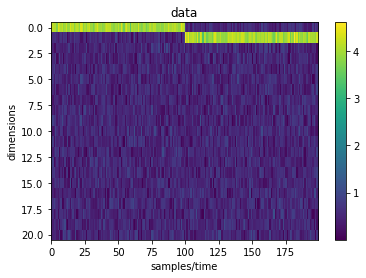

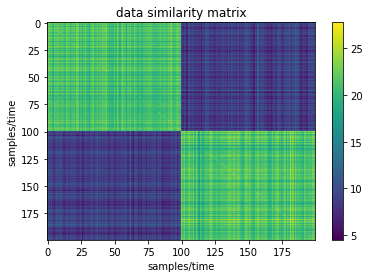

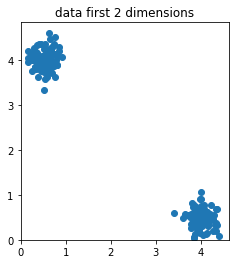

In [10]:
# #############################################################################
# #############################################################################
# #############################################################################
# the goal here is to create plots for understanding the influence
# of changeing rho and having multiple LNs, more than the number of clusters

# First let's create a dataset we want to work with:
# we will have 2 clusters
D = 21
dx = 0.5
ctr1 = np.zeros(D)+dx
ctr2 = np.zeros(D)+dx
x_max = 4
ctr1[0] = x_max
ctr2[1] = x_max

N = 100
scale = 0.2
cl1 = np.random.normal(size=[D, N], scale=scale) + ctr1[:, np.newaxis]
cl2 = np.random.normal(size=[D, N], scale=scale) + ctr2[:, np.newaxis]
X = np.abs(np.concatenate([cl1, cl2], axis=1))  # making it NN just in case
plt.figure()
plt.imshow(X, aspect='auto', interpolation='nearest')
plt.xlabel('samples/time')
plt.ylabel('dimensions')
plt.title('data')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(X.T @ X, aspect='auto', interpolation='nearest')
plt.xlabel('samples/time')
plt.ylabel('samples/time')
plt.title('data similarity matrix')
plt.colorbar()
plt.show()

plt.figure()
plt.scatter(*X[:2])
plt.xlim(0, None)
plt.ylim(0, None)
plt.title('data first 2 dimensions')
ax = plt.gca()
ax.set_aspect(1)
plt.show()
# pd.DataFrame(X).to_hdf(FO.OLF_PATH / f'results/dataset_2clusters.hdf', 'X')

# First, trying the original similarity matching function

!!!!!!!!  circ_alg pre_init failed, trying random  !!!!!!!!
sqrt(cost), error 1240.2478978446343 1240.2478978446309
!!!!!!!!  circ_alg pre_init failed, trying random  !!!!!!!!
sqrt(cost), error 3243.9882812002647 3243.9882812002643
sqrt(cost), error 36.03150838784508 36.03150838780253
sqrt(cost), error 1240.247847080783 1240.247847080783
sqrt(cost), error 3243.9872722945543 3243.9872722945543
calculating SNMF with k: 2
calculated SNMF via NMF function, error 36.0484963277136, init: random
init: pre_init, i: 54, alpha: 1.0000000000000004e-05, initial and final errors: 3243.988274400849, 1240.2478978446343
init: pre_init, i: 0, alpha: 0.010000000000000002, initial and final errors: 3243.988298092762, 3243.9882812002647
init: full_rand, i: 185, alpha: 1.0000000000000004e-05, initial and final errors: 3241.526362015232, 36.03150838784508
init: random, i: 55, alpha: 1.0000000000000004e-05, initial and final errors: 3243.98827952915, 1240.247847080783
init: random, i: 0, alpha: 0.00100000000

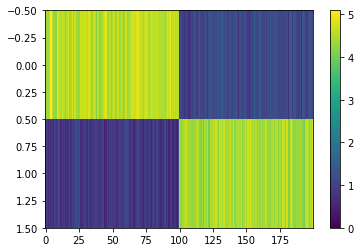

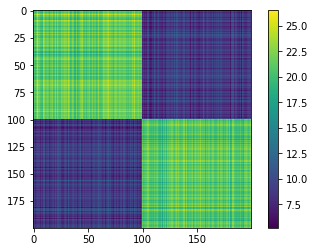

In [3]:
importlib.reload(nmf)
output = nmf.get_snmf_best_np(X, k=2, max_iter=100000)
Z = output[0]
plt.figure()
plt.imshow(Z, aspect='auto', interpolation='nearest',
           vmin=0)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Z.T @ Z, interpolation='nearest')
plt.colorbar()
plt.show()

# W = X @ Z.T
# print(W)

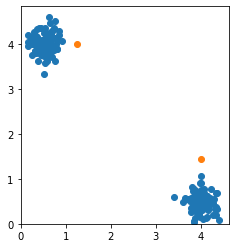

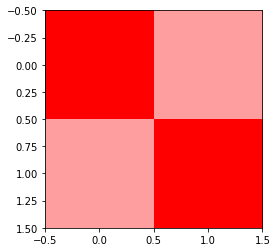

In [11]:
W = X @ Z.T
W = W/np.max(W, axis=0, keepdims=True)
plt.figure()
plt.scatter(*X[:2])
plt.scatter(*x_max*W[:2])
plt.xlim(0, None)
plt.ylim(0, None)
ax = plt.gca()
ax.set_aspect(1)
plt.show()
plt.figure()
corr = np.corrcoef(W.T)
links = sch.linkage(corr, method='average', optimal_ordering=True)
new_order = sch.leaves_list(links)
im = plt.imshow(corr[new_order][:, new_order], cmap='bwr', vmax=1, vmin=-1)
plt.colorbar(im, ax=ax)

plt.show()

# Now simulating the olfactory function with small rho, as comparison

In [17]:
rect = True
rho = .1
rho = 1
K = 2
# Y1, Z1, _ = FOC.olf_gd_offline(X, K, max_iter=10000, rectY=rect,
#                              rectZ=rect,
#                              alpha=50, cycle=500, rho=rho, beta=0.2, rtol=1e-7)

Y1, Z1, _ = FOC.olf_gd_offline(X, K, max_iter=10000, rectY=rect,
                             rectZ=rect,
                             alpha=1, cycle=500, rho=rho, beta=0.2, rtol=1e-7)

i: 0
cost1: 10.872474215696363, cost2: 10.764020754645404, cost3: 10.764021368427542, convergences y, z : 2.189093475799904, 0.0035722792577919374, alphas: 1, 1, deltacosts after y, z = 0.009975048815879115, 5.702164200480407e-08
i: 100
cost1: 3.9898557844921836, cost2: 3.9500600533932593, cost3: 3.950060863523535, convergences y, z : 0.007638618257050648, 0.005570027621168494, alphas: 1, 1, deltacosts after y, z = 0.009974227954203961, 2.0509315423102268e-07
i: 200
cost1: 1.469294948146809, cost2: 1.4547479097119032, cost3: 1.4549863209559668, convergences y, z : 0.0028837939114322287, 0.021173156703777743, alphas: 1, 1, deltacosts after y, z = 0.009900693154396036, 0.00016388491949156114
i: 300
cost1: 4.467129806675544, cost2: 4.44626489427129, cost3: 4.705925080048392, convergences y, z : 0.3837949725951095, 0.034393527926801885, alphas: 1, 1, deltacosts after y, z = 0.004670764743185664, 0.05839962124426189
i: 400
cost1: 4.69260226782595, cost2: 4.6795433488414035, cost3: 4.6877542

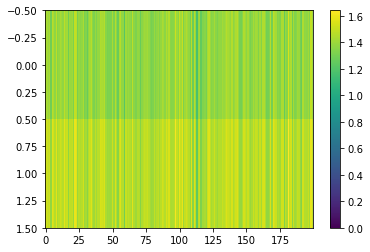

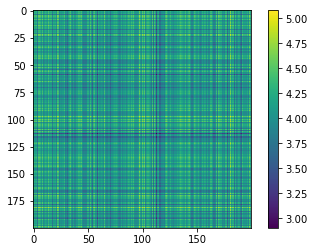

In [18]:
plt.figure()
plt.imshow(Z1, aspect='auto', interpolation='nearest',
           vmin=0)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Z1.T @ Z1, interpolation='nearest')
plt.colorbar()
plt.show()

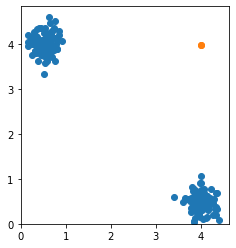

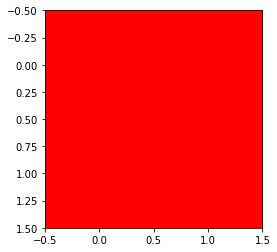

In [19]:
W = X @ Z1.T


W = W/np.max(W[:2], axis=0, keepdims=True)
plt.figure()
plt.scatter(*X[:2])
plt.scatter(*x_max*W[:2])
plt.xlim(0, None)
plt.ylim(0, None)
ax = plt.gca()
ax.set_aspect(1)
plt.show()
plt.figure()
corr = np.corrcoef(W.T)
links = sch.linkage(corr, method='average')
new_order = sch.leaves_list(links)
im = plt.imshow(corr[new_order][:, new_order], cmap='bwr', vmax=1, vmin=-1)
plt.colorbar(im, ax=ax)

plt.show()